Epoch 1/50
103/103 [==============================] - 1s 7ms/step - loss: 46.3312 - accuracy: 0.5417 - val_loss: 0.4471 - val_accuracy: 0.8938
Epoch 2/50
103/103 [==============================] - 1s 6ms/step - loss: 9.8158 - accuracy: 0.6074 - val_loss: 0.3122 - val_accuracy: 0.9136
Epoch 3/50
103/103 [==============================] - 1s 6ms/step - loss: 3.5043 - accuracy: 0.6799 - val_loss: 0.5347 - val_accuracy: 0.5977
Epoch 4/50
103/103 [==============================] - 1s 6ms/step - loss: 1.8722 - accuracy: 0.6476 - val_loss: 0.5530 - val_accuracy: 0.5113
Epoch 5/50
103/103 [==============================] - 1s 6ms/step - loss: 1.2770 - accuracy: 0.6646 - val_loss: 0.5947 - val_accuracy: 0.5227
Epoch 6/50
103/103 [==============================] - 1s 6ms/step - loss: 0.9121 - accuracy: 0.6671 - val_loss: 0.5907 - val_accuracy: 0.5482
Epoch 7/50
103/103 [==============================] - 1s 6ms/step - loss: 0.8539 - accuracy: 0.6683 - val_loss: 0.5779 - val_accuracy: 0.6346
Epoch

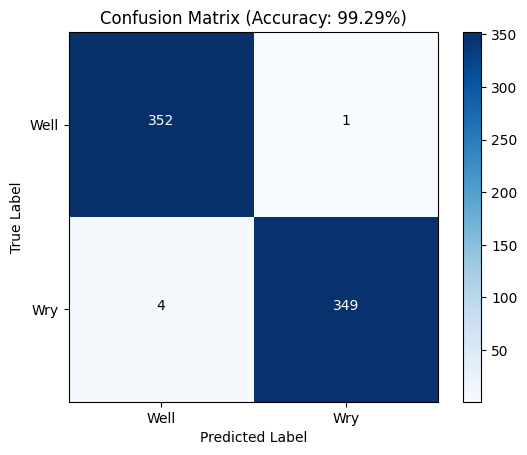

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import accuracy_score
import tensorflow as tf
import datetime
from sklearn.metrics import precision_score, recall_score

data = pd.read_csv('d.csv')

data_class_0 = data[data.iloc[:, -1] == 0]
data_class_1 = data[data.iloc[:, -1] == 1]


X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data_class_0.iloc[:, :-1].values, data_class_0.iloc[:, -1].values, test_size=0.3, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_class_1.iloc[:, :-1].values, data_class_1.iloc[:, -1].values, test_size=0.3, random_state=42)


X_train = np.concatenate((X_train_0, X_train_1), axis=0)
y_train = np.concatenate((y_train_0, y_train_1), axis=0)
X_test = np.concatenate((X_test_0, X_test_1), axis=0)
y_test = np.concatenate((y_test_0, y_test_1), axis=0)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test),callbacks=[tensorboard_callback])

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
confusion_mtx = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')

recall = recall_score(y_test, y_pred, average='macro')
print(precision,recall)

plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Accuracy: {:.2f}%)'.format(accuracy * 100))
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Well', 'Wry'])
plt.yticks(tick_marks, ['Well', 'Wry'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")

plt.show()
model.save('chicken.h5')

In [6]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, utils, models, callbacks as cb
import visualkeras



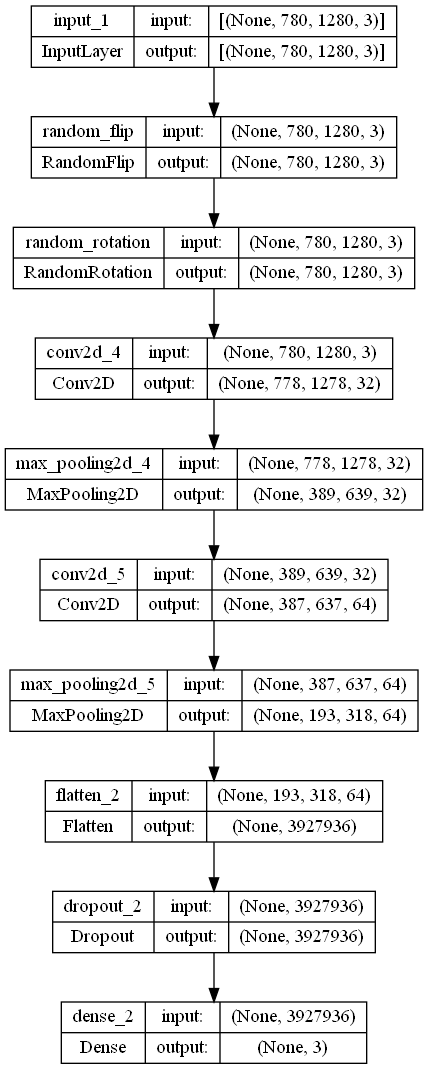

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

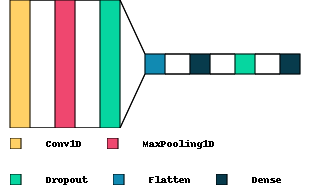

In [16]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=25)

In [28]:
%tensorboard --logdir logslast/fit


UsageError: Line magic function `%tensorboard` not found.


In [10]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=25).save('output3.png') 